# Detecting Faces wearing glasses with Support Vector Machines

In this notebook, we show how to perform face recognition using Support Vector Machines. We will use the Olivetti faces dataset, included in Scikit-learn. More info at:_ http://scikit-learn.org/stable/datasets/olivetti_faces.html 

We begin by importing numpy, scikit-learn, and pyplot, the Python libraries we will be using in this chapter. 

In [1]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print 'IPython version:', IPython.__version__
print 'numpy version:', np.__version__
print 'scikit-learn version:', sk.__version__
print 'matplotlib version:', matplotlib.__version__

Populating the interactive namespace from numpy and matplotlib
IPython version: 4.0.1
numpy version: 1.10.1
scikit-learn version: 0.17
matplotlib version: 1.5.0


Import the olivetti faces dataset

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# fetch the faces data
faces = fetch_olivetti_faces()

print faces.DESCR

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to C:\Users\ANIRUDDHA\scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



Let's look at the data, faces.images has 400 images of faces, each one is composed by a matrix of 64x64 pixels.
faces.data has the same data but in rows of 4096 attributes instead of matrices (4096 = 64x64)

In [3]:
print faces.keys()
print faces.images.shape
print faces.data.shape
print faces.target.shape


['images', 'data', 'target', 'DESCR']
(400L, 64L, 64L)
(400L, 4096L)
(400L,)


We don't have to scale attributes, because data is already normalized

In [4]:
print np.max(faces.data)
print np.min(faces.data)
print np.mean(faces.data)

1.0
0.0
0.547043


Plot the first 20 images. We have 40 individuals with 10 different images each.

In [5]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    

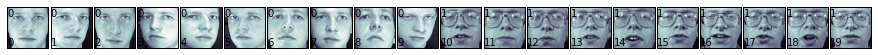

In [6]:
print_faces(faces.images, faces.target, 20)

Plot all the faces in a matrix of 20x20, for each one, we'll put it target value in the top left corner and it index in the bottom left corner.
It may take a few seconds.

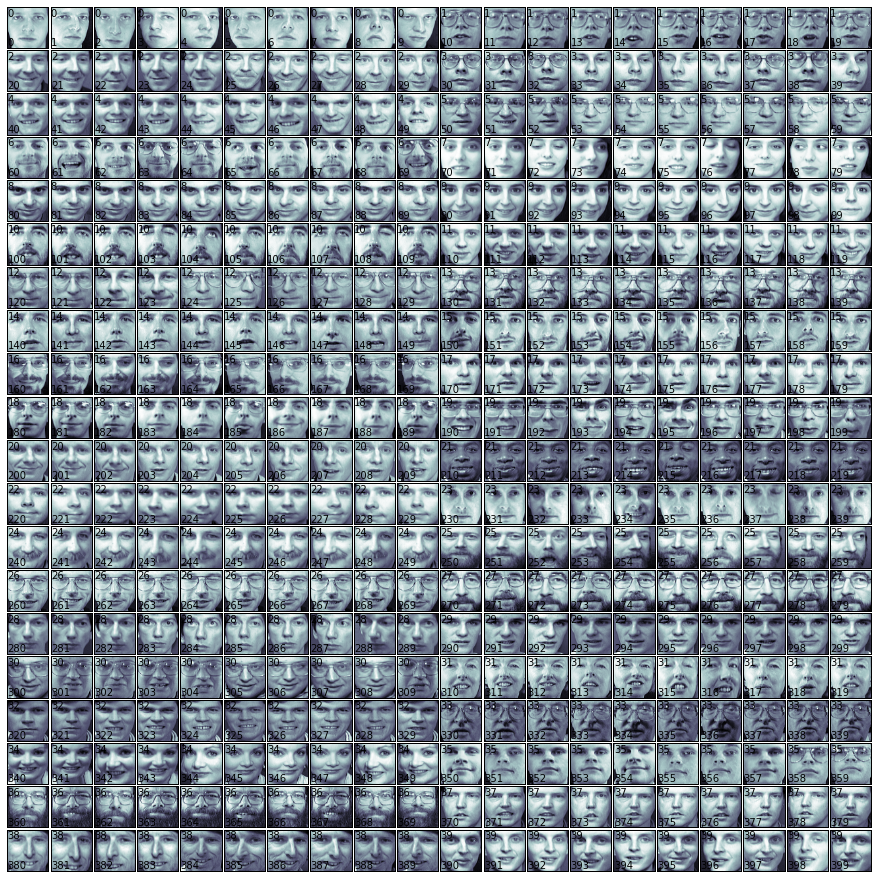

In [7]:
print_faces(faces.images, faces.target, 400)

We will try to build a classifier whose model is a hyperplane that separates instances (points) of one class from the rest. Support Vector Machines (SVM) are supervised learning methods that try to obtain these hyperplanes in an optimal way, by selecting the ones that pass through the widest possible gaps between instances of different classes. New instances will be classified as belonging to a certain category based on which side of the surfaces they fall on. Let's import the SVC class from the sklearn.svm module. SVC stands for Support Vector Classifier: we will use SVM for classification.

In [9]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print svc_1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Build training and testing sets

In [10]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)

Perform 5-fold cross-validation

In [11]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

In [12]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [13]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

Let's measure precision and recall on the evaluation set, for _each class_. 

In [14]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

### Classifying people with or without glasses

Performace on face recognition is very good. Now, another problem: let's try to classify images of people with and without glasses. Manually, we mark people with glasses. 

In [15]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

Create training and test set for the new problem

In [15]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [16]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, target_glasses, test_size=0.25, random_state=0)

We try with a [linear kernel](http://en.wikipedia.org/wiki/Kernel_%28linear_algebra%29).

In [17]:
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)
Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


Almost perfect! Now, let's separate 10 completely different images (all from the same person, sometimes with glasses and sometimes without glasses). With this we'll try to discard that it's remembering faces, instead of features related with glasses.We'll separate the subject with indexes from 30 to 39. We'll train and evaluate in the rest of the 390 instances. After that, we'll evaluate again over the separated 10 instances.


In [18]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print y_test.shape[0]

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print y_train.shape[0]

10
390


In [19]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


Show our evaluation faces, and their predicted category. Face number eight is incorrectly classified as no-glasses (probably because his eyes are closed!).

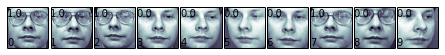

In [20]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)

Thus we used Support Vector Machines to effectively classify faces wearing glasses and the ones that don't.

___